# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](tttboard.jpg)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

In [1]:
# your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf # Library to construct neural newtorks. Low level library
from tensorflow import keras # High level library to handle tensorflow.
from tensorflow.keras.layers import Flatten, Dense, Dropout # Types of layers to use in our neural network.

import warnings
warnings.filterwarnings("ignore")

In [2]:
data= pd.read_csv("tic-tac-toe.csv")

In [3]:
data.head()

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True


In [4]:
data["class"].value_counts()

True     626
False    332
Name: class, dtype: int64

In [5]:
from sklearn.utils import resample
c_true = data[data["class"] == True]
c_false  = data[data["class"] == False]

In [6]:
data.columns

Index(['TL', 'TM', 'TR', 'ML', 'MM', 'MR', 'BL', 'BM', 'BR', 'class'], dtype='object')

In [7]:
# Convert the categorical values to numeric in all columns.

In [8]:
dum_df = pd.get_dummies(data, columns=['TL', 'TM', 'TR', 'ML', 'MM', 'MR', 'BL', 'BM', 'BR', 'class'],drop_first=True)

In [9]:
dum_df.head()

,TL_o,TL_x,TM_o,TM_x,TR_o,TR_x,ML_o,ML_x,MM_o,MM_x,MR_o,MR_x,BL_o,BL_x,BM_o,BM_x,BR_o,BR_x,class_True
0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,1
1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1
2,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,0,1,1
3,0,1,0,1,0,1,0,1,1,0,1,0,1,0,0,0,0,0,1
4,0,1,0,1,0,1,0,1,1,0,1,0,0,0,1,0,0,0,1


In [10]:
# Separate the inputs and output.

In [11]:
y= dum_df["class_True"]
x=dum_df.drop(columns="class_True")

In [12]:
# Already normalized
x.head()

,TL_o,TL_x,TM_o,TM_x,TR_o,TR_x,ML_o,ML_x,MM_o,MM_x,MR_o,MR_x,BL_o,BL_x,BM_o,BM_x,BR_o,BR_x
0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0
1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0
2,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,0,1
3,0,1,0,1,0,1,0,1,1,0,1,0,1,0,0,0,0,0
4,0,1,0,1,0,1,0,1,1,0,1,0,0,0,1,0,0,0


## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

In [13]:
# your code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=7)

print(X_train.shape)
print(X_test.shape)

(670, 18)
(288, 18)


In [24]:
model_c1 = keras.Sequential()
# Adding a hidden layer with:
# as many inputs as the number of features
# 9 neurons
# each neuron will have a "RELU" activation function
model_c1.add(Dense(units = 16,input_dim = X_train.shape[1],activation='relu'))
# Adding a new hidden layer with three neurons with "RELU" activation function
model_c1.add(Dense(units = 8,activation='relu'))
# Adding the final layer
model_c1.add(Dense(units = 2, activation='softmax'))

# Compile the final network
model_c1.compile(optimizer='adam', # Optimization method
              loss='sparse_categorical_crossentropy', # Error metric to minimize
              metrics='accuracy' # Error metrics to report
              )


model_c1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                304       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 2)                 18        
                                                                 
Total params: 458
Trainable params: 458
Non-trainable params: 0
_________________________________________________________________


In [28]:
from tensorflow.keras.callbacks import EarlyStopping # This callback allows you to stop the training if the validation error increases
from tensorflow.keras.callbacks import ModelCheckpoint # This callback allows you to save the model.
early_stopping = EarlyStopping(patience=5) 

checkpoint_path = 'cls-nn1.hdf5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_freq='epoch',
    save_weights_only=False,
    verbose=1
)

In [30]:
history_c1 = model_c1.fit(
    X_train, 
    y_train, 
    epochs=60, 
    validation_split=0.20, 
    batch_size=10, 
    verbose=2,
    callbacks=[early_stopping,checkpoint]
)

Epoch 1/60

Epoch 1: saving model to cls-nn1.hdf5
54/54 - 1s - loss: 0.7944 - accuracy: 0.6567 - val_loss: 0.6690 - val_accuracy: 0.3507 - 749ms/epoch - 14ms/step
Epoch 2/60

Epoch 2: saving model to cls-nn1.hdf5
54/54 - 0s - loss: 0.6300 - accuracy: 0.1213 - val_loss: 0.5994 - val_accuracy: 0.0672 - 93ms/epoch - 2ms/step
Epoch 3/60

Epoch 3: saving model to cls-nn1.hdf5
54/54 - 0s - loss: 0.5887 - accuracy: 0.0354 - val_loss: 0.5634 - val_accuracy: 0.0746 - 93ms/epoch - 2ms/step
Epoch 4/60

Epoch 4: saving model to cls-nn1.hdf5
54/54 - 0s - loss: 0.5640 - accuracy: 0.0485 - val_loss: 0.5314 - val_accuracy: 0.1194 - 94ms/epoch - 2ms/step
Epoch 5/60

Epoch 5: saving model to cls-nn1.hdf5
54/54 - 0s - loss: 0.5433 - accuracy: 0.1157 - val_loss: 0.5041 - val_accuracy: 0.1567 - 94ms/epoch - 2ms/step
Epoch 6/60

Epoch 6: saving model to cls-nn1.hdf5
54/54 - 0s - loss: 0.5199 - accuracy: 0.1194 - val_loss: 0.4796 - val_accuracy: 0.1866 - 95ms/epoch - 2ms/step
Epoch 7/60

Epoch 7: saving mode

Epoch 52/60

Epoch 52: saving model to cls-nn1.hdf5
54/54 - 0s - loss: 0.0167 - accuracy: 0.3321 - val_loss: 0.0311 - val_accuracy: 0.3433 - 90ms/epoch - 2ms/step
Epoch 53/60

Epoch 53: saving model to cls-nn1.hdf5
54/54 - 0s - loss: 0.0156 - accuracy: 0.3321 - val_loss: 0.0268 - val_accuracy: 0.3507 - 91ms/epoch - 2ms/step
Epoch 54/60

Epoch 54: saving model to cls-nn1.hdf5
54/54 - 0s - loss: 0.0152 - accuracy: 0.3321 - val_loss: 0.0267 - val_accuracy: 0.3507 - 88ms/epoch - 2ms/step
Epoch 55/60

Epoch 55: saving model to cls-nn1.hdf5
54/54 - 0s - loss: 0.0137 - accuracy: 0.3321 - val_loss: 0.0248 - val_accuracy: 0.3507 - 95ms/epoch - 2ms/step
Epoch 56/60

Epoch 56: saving model to cls-nn1.hdf5
54/54 - 0s - loss: 0.0138 - accuracy: 0.3321 - val_loss: 0.0244 - val_accuracy: 0.3507 - 94ms/epoch - 2ms/step
Epoch 57/60

Epoch 57: saving model to cls-nn1.hdf5
54/54 - 0s - loss: 0.0138 - accuracy: 0.3321 - val_loss: 0.0235 - val_accuracy: 0.3507 - 92ms/epoch - 2ms/step
Epoch 58/60

Epoch 58:

In [31]:
def plot_metric(history, metric):
    train_metrics = history.history[metric] # Get the error metric for the TRAIN set
    val_metrics = history.history['val_'+metric] # Get the error metric for the VALIDATION set
    epochs = range(1, len(train_metrics) + 1) # range(1,6) -> 1,2,3,4,5
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.yscale('log')
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

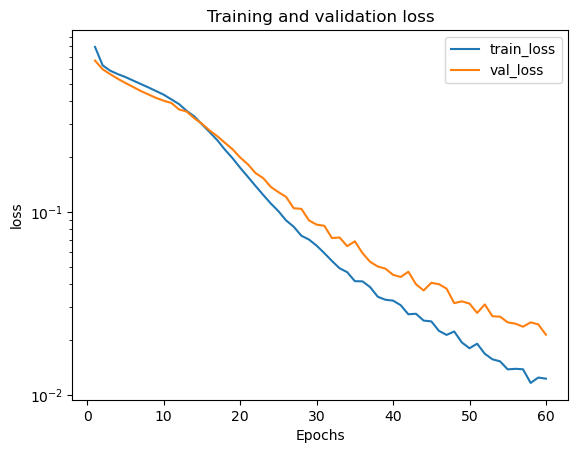

In [32]:
plot_metric(history_c1,'loss')

In [36]:
def model_performance_class(y_train, y_pred_train, y_test, y_pred_test):

    from sklearn.metrics import cohen_kappa_score, classification_report 


    print("Results obtained for the TRAIN SET")
    print("==================================")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_train, y_pred_train)))
    print(classification_report(y_train, y_pred_train))
    print("==================================")
    print("Results obtained for the TEST SET")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_test, y_pred_test)))
    print(classification_report(y_test, y_pred_test))


In [39]:
y_pred_train_c1 = model_c1.predict(X_train) # This provides the probability for each class
y_pred_test_c1  = model_c1.predict(X_test) # This provides the probability for each class

# We need to extract for each row which is the class which the highest probability
# which corresponds to the index of the sublist
y_pred_train_c1 = np.argmax(y_pred_train_c1, axis=1).reshape(-1,1)
y_pred_test_c1  = np.argmax(y_pred_test_c1, axis=1).reshape(-1,1)

model_performance_class(y_train, y_pred_train_c1, y_test, y_pred_test_c1)

9/9 [==============================] - 0s 884us/step
Results obtained for the TRAIN SET
The Cohen's Kappa is: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       225
           1       1.00      1.00      1.00       445

    accuracy                           1.00       670
   macro avg       1.00      1.00      1.00       670
weighted avg       1.00      1.00      1.00       670

Results obtained for the TEST SET
The Cohen's Kappa is: 0.93
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       107
           1       0.97      0.98      0.98       181

    accuracy                           0.97       288
   macro avg       0.97      0.96      0.97       288
weighted avg       0.97      0.97      0.97       288



## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

In [ ]:
# your code here

In [64]:
import random
l=random.sample(range(len(y_pred_test_c1)), 3)

for i in l:
    if y_test[i]==y_pred_test_c1[i]:
        print("Predicted correctly!")
        print(y_pred_test_c1[i],y_test[i] )
    else:
        print("Predicted incorrectly :(")
        print(y_pred_test_c1[i],y_test[i] )

Predicted correctly!
[1] [1]
Predicted correctly!
[0] [0]
Predicted correctly!
[1] [1]


## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

In [ ]:
# your code here

In [ ]:
# Adding a layer

In [65]:
model_c2 = keras.Sequential()
# Adding a hidden layer with:
# as many inputs as the number of features
# 9 neurons
# each neuron will have a "RELU" activation function
model_c2.add(Dense(units = 32,input_dim = X_train.shape[1],activation='relu'))
# Adding a new hidden layer with three neurons with "RELU" activation function
model_c2.add(Dense(units = 16,activation='relu'))
model_c2.add(Dense(units = 8,activation='relu'))
# Adding the final layer
model_c2.add(Dense(units = 2, activation='softmax'))

# Compile the final network
model_c2.compile(optimizer='adam', # Optimization method
              loss='sparse_categorical_crossentropy', # Error metric to minimize
              metrics='accuracy' # Error metrics to report
              )


model_c2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 32)                608       
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dense_17 (Dense)            (None, 8)                 136       
                                                                 
 dense_18 (Dense)            (None, 2)                 18        
                                                                 
Total params: 1,290
Trainable params: 1,290
Non-trainable params: 0
_________________________________________________________________


In [66]:
checkpoint_path = 'cls-nn2.hdf5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_freq='epoch',
    save_weights_only=False,
    verbose=1
)

In [67]:
history_c2 = model_c2.fit(
    X_train, 
    y_train, 
    epochs=60, 
    validation_split=0.20, 
    batch_size=10, 
    verbose=2,
    callbacks=[early_stopping,checkpoint]
)

Epoch 1/60

Epoch 1: saving model to cls-nn2.hdf5
54/54 - 1s - loss: 0.6552 - accuracy: 0.6175 - val_loss: 0.6125 - val_accuracy: 0.6493 - 790ms/epoch - 15ms/step
Epoch 2/60

Epoch 2: saving model to cls-nn2.hdf5
54/54 - 0s - loss: 0.5873 - accuracy: 0.6698 - val_loss: 0.5538 - val_accuracy: 0.6716 - 97ms/epoch - 2ms/step
Epoch 3/60

Epoch 3: saving model to cls-nn2.hdf5
54/54 - 0s - loss: 0.5360 - accuracy: 0.7276 - val_loss: 0.4920 - val_accuracy: 0.8433 - 99ms/epoch - 2ms/step
Epoch 4/60

Epoch 4: saving model to cls-nn2.hdf5
54/54 - 0s - loss: 0.4844 - accuracy: 0.8116 - val_loss: 0.4378 - val_accuracy: 0.7910 - 111ms/epoch - 2ms/step
Epoch 5/60

Epoch 5: saving model to cls-nn2.hdf5
54/54 - 0s - loss: 0.4454 - accuracy: 0.8078 - val_loss: 0.3689 - val_accuracy: 0.8657 - 98ms/epoch - 2ms/step
Epoch 6/60

Epoch 6: saving model to cls-nn2.hdf5
54/54 - 0s - loss: 0.3946 - accuracy: 0.8358 - val_loss: 0.3244 - val_accuracy: 0.8881 - 99ms/epoch - 2ms/step
Epoch 7/60

Epoch 7: saving mod

54/54 - 0s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000 - 103ms/epoch - 2ms/step
Epoch 52/60

Epoch 52: saving model to cls-nn2.hdf5
54/54 - 0s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000 - 102ms/epoch - 2ms/step
Epoch 53/60

Epoch 53: saving model to cls-nn2.hdf5
54/54 - 0s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000 - 102ms/epoch - 2ms/step
Epoch 54/60

Epoch 54: saving model to cls-nn2.hdf5
54/54 - 0s - loss: 9.9630e-04 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000 - 107ms/epoch - 2ms/step
Epoch 55/60

Epoch 55: saving model to cls-nn2.hdf5
54/54 - 0s - loss: 9.0099e-04 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 1.0000 - 104ms/epoch - 2ms/step
Epoch 56/60

Epoch 56: saving model to cls-nn2.hdf5
54/54 - 0s - loss: 8.7688e-04 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000 - 103ms/epoch - 2ms/step
Epoch 57/60

Epoch 57: saving model to cls-nn2.hdf5
54/5

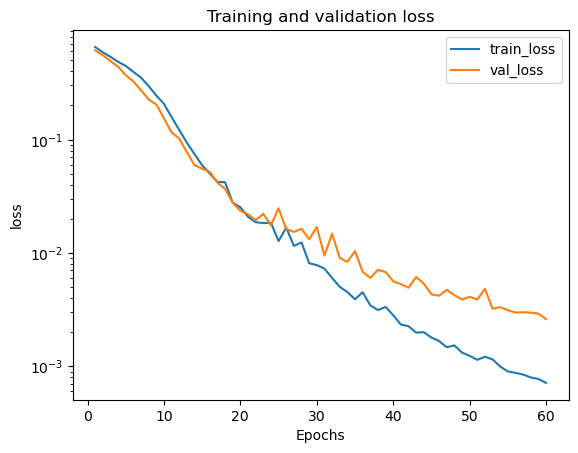

In [68]:
plot_metric(history_c2,'loss')

In [69]:
y_pred_train_c1 = model_c2.predict(X_train) # This provides the probability for each class
y_pred_test_c1  = model_c2.predict(X_test) # This provides the probability for each class

# We need to extract for each row which is the class which the highest probability
# which corresponds to the index of the sublist
y_pred_train_c1 = np.argmax(y_pred_train_c1, axis=1).reshape(-1,1)
y_pred_test_c1  = np.argmax(y_pred_test_c1, axis=1).reshape(-1,1)

model_performance_class(y_train, y_pred_train_c1, y_test, y_pred_test_c1)

9/9 [==============================] - 0s 997us/step
Results obtained for the TRAIN SET
The Cohen's Kappa is: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       225
           1       1.00      1.00      1.00       445

    accuracy                           1.00       670
   macro avg       1.00      1.00      1.00       670
weighted avg       1.00      1.00      1.00       670

Results obtained for the TEST SET
The Cohen's Kappa is: 0.95
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       107
           1       0.97      0.99      0.98       181

    accuracy                           0.98       288
   macro avg       0.98      0.97      0.97       288
weighted avg       0.98      0.98      0.98       288



In [ ]:
# Reducing learning rate

In [71]:
optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name='Adam',
   
)

model_c2 = keras.Sequential()
# Adding a hidden layer with:
# as many inputs as the number of features
# 9 neurons
# each neuron will have a "RELU" activation function
model_c2.add(Dense(units = 32,input_dim = X_train.shape[1],activation='relu'))
# Adding a new hidden layer with three neurons with "RELU" activation function
model_c2.add(Dense(units = 16,activation='relu'))
model_c2.add(Dense(units = 8,activation='relu'))
# Adding the final layer
model_c2.add(Dense(units = 2, activation='softmax'))

# Compile the final network
model_c2.compile(optimizer=optimizer, # Optimization method
              loss='sparse_categorical_crossentropy', # Error metric to minimize
              metrics='accuracy' # Error metrics to report
              )


model_c2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 32)                608       
                                                                 
 dense_20 (Dense)            (None, 16)                528       
                                                                 
 dense_21 (Dense)            (None, 8)                 136       
                                                                 
 dense_22 (Dense)            (None, 2)                 18        
                                                                 
Total params: 1,290
Trainable params: 1,290
Non-trainable params: 0
_________________________________________________________________


In [72]:
checkpoint_path = 'cls-nn2.hdf5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_freq='epoch',
    save_weights_only=False,
    verbose=1
)

In [73]:
history_c2 = model_c2.fit(
    X_train, 
    y_train, 
    epochs=60, 
    validation_split=0.20, 
    batch_size=10, 
    verbose=2,
    callbacks=[early_stopping,checkpoint]
)

Epoch 1/60

Epoch 1: saving model to cls-nn2.hdf5
54/54 - 1s - loss: 0.6447 - accuracy: 0.6455 - val_loss: 0.5862 - val_accuracy: 0.6791 - 786ms/epoch - 15ms/step
Epoch 2/60

Epoch 2: saving model to cls-nn2.hdf5
54/54 - 0s - loss: 0.5742 - accuracy: 0.6996 - val_loss: 0.5110 - val_accuracy: 0.7687 - 99ms/epoch - 2ms/step
Epoch 3/60

Epoch 3: saving model to cls-nn2.hdf5
54/54 - 0s - loss: 0.5233 - accuracy: 0.7854 - val_loss: 0.4496 - val_accuracy: 0.8657 - 100ms/epoch - 2ms/step
Epoch 4/60

Epoch 4: saving model to cls-nn2.hdf5
54/54 - 0s - loss: 0.4850 - accuracy: 0.8060 - val_loss: 0.4066 - val_accuracy: 0.8657 - 98ms/epoch - 2ms/step
Epoch 5/60

Epoch 5: saving model to cls-nn2.hdf5
54/54 - 0s - loss: 0.4376 - accuracy: 0.8265 - val_loss: 0.3683 - val_accuracy: 0.8881 - 96ms/epoch - 2ms/step
Epoch 6/60

Epoch 6: saving model to cls-nn2.hdf5
54/54 - 0s - loss: 0.3929 - accuracy: 0.8619 - val_loss: 0.3236 - val_accuracy: 0.8955 - 105ms/epoch - 2ms/step
Epoch 7/60

Epoch 7: saving mo

54/54 - 0s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 1.0000 - 109ms/epoch - 2ms/step
Epoch 52/60

Epoch 52: saving model to cls-nn2.hdf5
54/54 - 0s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0099 - val_accuracy: 1.0000 - 101ms/epoch - 2ms/step
Epoch 53/60

Epoch 53: saving model to cls-nn2.hdf5
54/54 - 0s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 1.0000 - 100ms/epoch - 2ms/step
Epoch 54/60

Epoch 54: saving model to cls-nn2.hdf5
54/54 - 0s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0099 - val_accuracy: 1.0000 - 98ms/epoch - 2ms/step
Epoch 55/60

Epoch 55: saving model to cls-nn2.hdf5
54/54 - 0s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 1.0000 - 99ms/epoch - 2ms/step
Epoch 56/60

Epoch 56: saving model to cls-nn2.hdf5
54/54 - 0s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 1.0000 - 97ms/epoch - 2ms/step
Epoch 57/60

Epoch 57: saving model to cls-nn2.hdf5
54/54 - 0s - loss: 

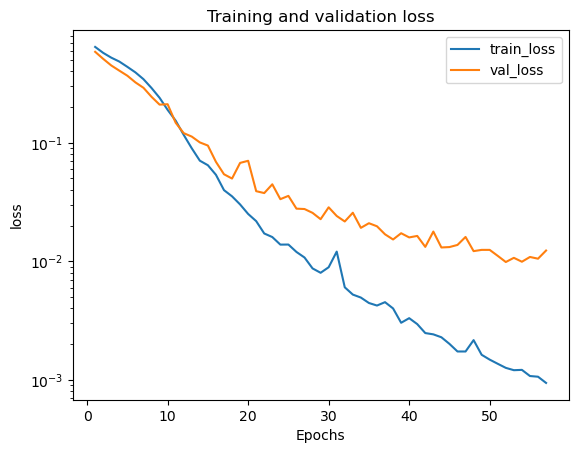

In [74]:
plot_metric(history_c2,'loss')

In [75]:
y_pred_train_c1 = model_c2.predict(X_train) # This provides the probability for each class
y_pred_test_c1  = model_c2.predict(X_test) # This provides the probability for each class

# We need to extract for each row which is the class which the highest probability
# which corresponds to the index of the sublist
y_pred_train_c1 = np.argmax(y_pred_train_c1, axis=1).reshape(-1,1)
y_pred_test_c1  = np.argmax(y_pred_test_c1, axis=1).reshape(-1,1)

model_performance_class(y_train, y_pred_train_c1, y_test, y_pred_test_c1)

9/9 [==============================] - 0s 997us/step
Results obtained for the TRAIN SET
The Cohen's Kappa is: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       225
           1       1.00      1.00      1.00       445

    accuracy                           1.00       670
   macro avg       1.00      1.00      1.00       670
weighted avg       1.00      1.00      1.00       670

Results obtained for the TEST SET
The Cohen's Kappa is: 0.95
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       107
           1       0.97      0.99      0.98       181

    accuracy                           0.98       288
   macro avg       0.98      0.97      0.97       288
weighted avg       0.98      0.98      0.98       288



In [ ]:
# Now increasing the nummber of epochs

In [76]:
history_c2 = model_c2.fit(
    X_train, 
    y_train, 
    epochs=150, 
    validation_split=0.20, 
    batch_size=10, 
    verbose=2,
    callbacks=[early_stopping,checkpoint]
)

Epoch 1/150

Epoch 1: saving model to cls-nn2.hdf5
54/54 - 0s - loss: 9.1698e-04 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 1.0000 - 129ms/epoch - 2ms/step
Epoch 2/150

Epoch 2: saving model to cls-nn2.hdf5
54/54 - 0s - loss: 9.0242e-04 - accuracy: 1.0000 - val_loss: 0.0097 - val_accuracy: 1.0000 - 99ms/epoch - 2ms/step
Epoch 3/150

Epoch 3: saving model to cls-nn2.hdf5
54/54 - 0s - loss: 7.8356e-04 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 1.0000 - 98ms/epoch - 2ms/step
Epoch 4/150

Epoch 4: saving model to cls-nn2.hdf5
54/54 - 0s - loss: 7.4835e-04 - accuracy: 1.0000 - val_loss: 0.0090 - val_accuracy: 1.0000 - 100ms/epoch - 2ms/step
Epoch 5/150

Epoch 5: saving model to cls-nn2.hdf5
54/54 - 0s - loss: 7.2994e-04 - accuracy: 1.0000 - val_loss: 0.0083 - val_accuracy: 1.0000 - 98ms/epoch - 2ms/step
Epoch 6/150

Epoch 6: saving model to cls-nn2.hdf5
54/54 - 0s - loss: 6.9913e-04 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy: 0.9925 - 102ms/epoch - 2ms/step
E

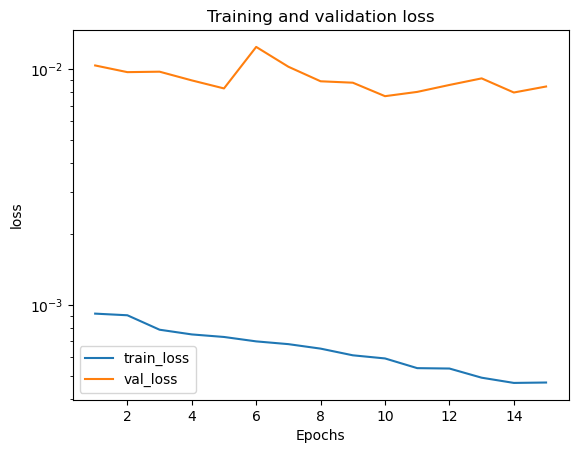

In [77]:
plot_metric(history_c2,'loss')

In [78]:
y_pred_train_c1 = model_c2.predict(X_train) # This provides the probability for each class
y_pred_test_c1  = model_c2.predict(X_test) # This provides the probability for each class

# We need to extract for each row which is the class which the highest probability
# which corresponds to the index of the sublist
y_pred_train_c1 = np.argmax(y_pred_train_c1, axis=1).reshape(-1,1)
y_pred_test_c1  = np.argmax(y_pred_test_c1, axis=1).reshape(-1,1)

model_performance_class(y_train, y_pred_train_c1, y_test, y_pred_test_c1)

9/9 [==============================] - 0s 997us/step
Results obtained for the TRAIN SET
The Cohen's Kappa is: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       225
           1       1.00      1.00      1.00       445

    accuracy                           1.00       670
   macro avg       1.00      1.00      1.00       670
weighted avg       1.00      1.00      1.00       670

Results obtained for the TEST SET
The Cohen's Kappa is: 0.95
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       107
           1       0.97      0.99      0.98       181

    accuracy                           0.98       288
   macro avg       0.98      0.97      0.97       288
weighted avg       0.98      0.98      0.98       288



**Which approach(es) did you find helpful to improve your model performance?**

In [ ]:
# your answer here

In [ ]:
#All three methods seemed to improve the model performance